# ML4 KNN CASE1

Referred dataset : "Iris"

Dataset Source : "Scikit" In-built

http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Petals are the colorful leaves of the flowers, surrounding the fertilization part.

Sepals are the mostly green color protective portion surrounding the petals, and provide the protection and strength to the flower before and during blooming. 

### Step 1 : Observe the dataset

In [1]:
from statsmodels.api import datasets

In [2]:
iris = datasets.get_rdataset("iris")
iris.data.columns = ["Sepal_Length", "Sepal_Width", \
                     "Petal_Length","Petal_Width", "Species"]

iris.data.head()

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here are 4 features containing the dimension of the flowers.
And here is 1 label column mentioning the species.
Our purpose is to create and test a KNN algorithm, to identified the correct species of a flower based on the provided features i.e. dimensions.

### Step 2: Check the data types of each columns(features)

In [3]:
iris.data.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

Here all the features are float types (as expected for this dataset). The label is string/text type.

### Step 3: Identify the categories, and the number of times they are found in this provided dataset.

In [4]:
iris.data["count"] = 1
iris.data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,count
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [5]:

#iris.data[["Species","count"]]
iris.data[["Species","count"]].groupby("Species").count()

,count
Species,
setosa,50
versicolor,50
virginica,50


We observed, there are three species identified in whole dataset.

Each species mentioned 50 times equally.

### Step 4: Identify the categories in plots

In [6]:
# Creating a new function plot_iris
def plot_iris(iris, col1, col2):
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.lmplot(x = col1, y = col2,
              data = iris,
              hue = "Species",
              fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Iris Species")
    plt.show()


In [7]:
# Running the function plot_iris on the available data    
plot_iris(iris.data, "Petal_Width", "Sepal_Length")


<Figure size 617.75x500 with 1 Axes>

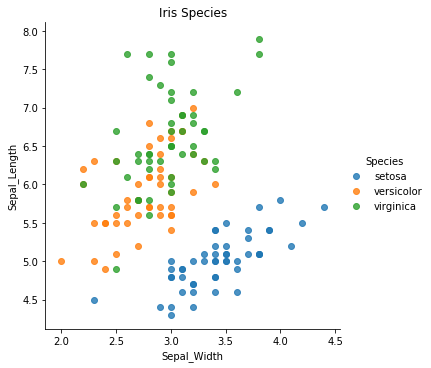

In [8]:
plot_iris(iris.data, "Sepal_Width", "Sepal_Length")

In these two graphs, we observed that the species "Setosa" is very much clear and separated, while other species has some overlappings. This means that when we run a machine learning algorithm, there will be less inaccuracy in identifying the "Setosa" species, but there will be more inaccuracy in other species.

### Step 5: Data Preparation

Data Preparation is very crucial part before running the machine learning algorithm. The important steps are as below:
    
    Removing observations having missing values or filling the missing values with appropriate mean or zero values.
    
    Scale the numerical values of features, so that features have values in similar range. Otherwise, features with larger value range may dominate the machine learning model. This process is called normalization. During normalization, it is mostly desired to have mean equals to 0 and the variance  equals to 1.
    
    Splitting the data into the 'training set' and 'testing set'. This is needful to check the accuracy and efficiency of the machine learning model, before applying it to the unknown data of the real world.

In [9]:
from sklearn.preprocessing import scale
import pandas as pd

colnames = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]

iris_scaled = scale(iris.data[colnames])

iris_scaled = pd.DataFrame(iris_scaled, columns = colnames)
print(iris_scaled)
# print(iris_scaled.describe().round())

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


### Step 6: Numerization of the labels

The methods in the sci-kit package requires numpy arrays as arguments. So, the strings mentioned in "Species" column must be converted into numbers. We shall use a dictionary lookup method for this conversion into whole dataset.

In [10]:
levels = {"setosa":0, "versicolor":1, "virginica":2}

iris_scaled["Species"] = [levels[x] for x in iris.data["Species"]]

iris_scaled.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2
149,0.068662,-0.131979,0.762758,0.790671,2


### Step 7: Splitting the data into Training and Testing set.

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(2509)



In [12]:

iris_split = train_test_split(np.asmatrix(iris_scaled), \
                              test_size=75)
iris_split

[matrix([[-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
          -1.05217993e+00,  0.00000000e+00],
         [ 1.03800476e+00, -1.31979479e-01,  7.05920842e-01,
           6.59038469e-01,  1.00000000e+00],
         [-9.00681170e-01,  1.70959465e+00, -1.05603939e+00,
          -1.05217993e+00,  0.00000000e+00],
         [-4.16009689e-01,  1.01900435e+00, -1.39706395e+00,
          -1.31544430e+00,  0.00000000e+00],
         [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
           9.22302838e-01,  2.00000000e+00],
         [-9.00681170e-01,  1.70959465e+00, -1.28338910e+00,
          -1.18381211e+00,  0.00000000e+00],
         [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
           9.22302838e-01,  2.00000000e+00],
         [ 7.95669016e-01,  3.28414053e-01,  7.62758269e-01,
           1.05393502e+00,  2.00000000e+00],
         [-5.25060772e-02, -5.92373012e-01,  7.62758269e-01,
           1.58046376e+00,  2.00000000e+00],
         [ 5.53333275e-01, -1.28296331e+00,  6

In [13]:
#type(np.asmatrix(iris_scaled))

In [14]:
iris_train_features = iris_split[0][:,:4]
iris_train_labels = np.ravel(iris_split[0][:,4])

iris_test_features = iris_split[1][:,:4]
iris_test_labels = np.ravel(iris_split[1][:,4])


In [15]:
#np.ravel(iris_split[0][:,4])

In [16]:
print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


### Step 8: Training and Evaluation of Machine Learning model using KNN Algorithm

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Mod = KNeighborsClassifier(n_neighbors = 3)

KNN_Mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In above codes, we created a training model "KNN_Mod" and used '.fit()' method over it by passing the training set (calling the splitted sets together).

Now, we need to test the accuracy of the trained model. We shall do it by calling the features from test data without label, and will then compare the result with the existing label. Accuracy will be calculated in %ge for the correctly classified results.

In [18]:
iris_test = pd.DataFrame(iris_test_features, columns = colnames)

In [19]:
iris_test["predicted"] = KNN_Mod.predict(iris_test_features)

In [20]:
iris_test["correct"] = [1 if x==z else 0 for x, z in zip(iris_test["predicted"], iris_test_labels)]

In [21]:
iris_test

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,predicted,correct
0,1.643844,0.328414,1.274295,0.790671,2.0,1
1,-0.900681,1.019004,-1.340227,-1.183812,0.0,1
2,-1.627688,-1.743357,-1.397064,-1.183812,0.0,1
3,-1.021849,1.249201,-1.340227,-1.315444,0.0,1
4,-0.416010,-1.513160,-0.032966,-0.262387,1.0,1
...,...,...,...,...,...,...
70,0.553333,-1.743357,0.364896,0.132510,1.0,1
71,0.068662,0.328414,0.592246,0.790671,1.0,1
72,-0.173674,-0.592373,0.421734,0.132510,1.0,1
73,2.128516,-0.131979,1.615320,1.185567,2.0,1


In [22]:
accuracy = 100 * (sum(iris_test["correct"])/iris_test.shape[0])

In [23]:
print(accuracy)

90.66666666666666


In [24]:
iris_test.shape[0]

75